In [129]:
import alpaca_trade_api as tradeapi
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns

In [130]:
APCA_API_KEY_ID = 'PKA0XDHFOR2QBKHE7Y7L'
APCA_API_SECRET_KEY = 'r37925RNYTZFUpGewDxaxC1fHwdjHohUojdWBJ0e'
APCA_API_BASE_URL = 'https://paper-api.alpaca.markets'

# Getting Stock Data

In [139]:
from alpaca_trade_api.rest import REST, TimeFrame
api = tradeapi.REST(APCA_API_KEY_ID, APCA_API_SECRET_KEY)

# get user info
symbols = input("Enter Stock Symbols (separated by space): ").split(' ')
days_ago_start = input("Enter the Number of Trading Days Ago to Start Stock Data: ")
days_ago_end = input("Enter the Number of Trading Days Ago to End Stock Data (>0): ")

trades_df = pd.DataFrame()
start_date = (datetime.now() - timedelta(days=int(days_ago_start))).strftime("%Y-%m-%d")
end_date = (datetime.now() - timedelta(days=int(days_ago_end))).strftime("%Y-%m-%d")

for symbol in symbols:
    # get data for each stock
    bars_df = api.get_bars(symbol, TimeFrame.Day, start_date, end_date, adjustment='all').df
    # calculate daily percentage change for each stock
    bars_df["perc_chng"] = ((bars_df["close"] - bars_df["open"]) / bars_df["open"]) * 100
    trades_df[symbol] = bars_df["perc_chng"]
    
trades_df['date'] = pd.to_datetime(trades_df.index).date
trades_df = trades_df.set_index('date')
trades_df

Enter Stock Symbols (separated by space): NVDA AAPL QQQ NDAQ MVIS
Enter the Number of Trading Days Ago to Start Stock Data: 7
Enter the Number of Trading Days Ago to End Stock Data (>0): 1


,NVDA,AAPL,QQQ,NDAQ,MVIS
date,,,,,
2023-03-16,6.301244,2.425079,2.957586,3.186322,4.782609
2023-03-17,-0.989146,-0.691953,-0.444082,-0.827223,-9.583333
2023-03-20,1.112629,1.502547,0.562019,0.474654,-2.293578
2023-03-21,0.072574,1.245868,0.779373,0.596014,-0.934579
2023-03-22,0.162725,-0.873006,-1.337545,-1.981115,-3.773585


# Covariance Table

Text(0.5, 1.0, 'Covariance Heatmap')

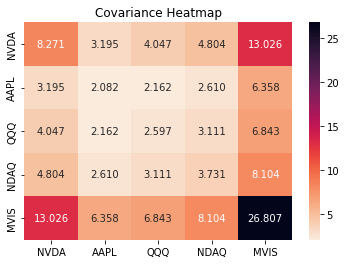

In [145]:
cov_table = trades_df.cov()
cov_heatmap = sns.heatmap(cov_table,
                 annot=True,
                 fmt=".3f",
                 xticklabels=cov_table.columns,
                 yticklabels=cov_table.columns,
                 cmap = sns.cm.rocket_r)

cov_heatmap.set_title("Covariance Heatmap")

# Coefficient of Correlation Table

Text(0.5, 1.0, 'Coefficient of Correlation Heatmap')

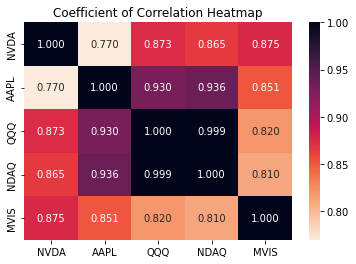

In [146]:
corr_table = trades_df.corr()
corr_heatmap = sns.heatmap(corr_table,
                 annot=True,
                 fmt=".3f",
                 xticklabels=corr_table.columns,
                 yticklabels=corr_table.columns,
                 cmap = sns.cm.rocket_r)

corr_heatmap.set_title("Coefficient of Correlation Heatmap")